In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import math
import sys
sys.path.append('..')
import pyzx as zx
from pyzx.linalg import Mat2

In [3]:
m1 = Mat2([[1,0],
           [1,1]])
m2 = Mat2([[1,1],
           [1,1]])
m3 = Mat2([[1,0,1,1,0],
           [1,1,1,0,0],
           [1,1,0,0,1],
           [0,1,0,1,0],
           [0,0,1,1,0]])
m4 = Mat2([[1,0,1,0,0],
           [0,1,1,0,0],
           [1,1,0,0,1],
           [0,1,0,1,0],
           [0,0,0,1,1]])

In [3]:
result = Mat2([[1,1],[0,0]])
m1 * m2 == result

True

In [12]:
m3c = m3.copy()
m3c.gauss(full_reduce=True)
m3c.data[2][0] = 1
m3c.data[4][4] = 1
m3c

[ 1  0  0  0  0 ]
[ 0  1  0  0  1 ]
[ 1  0  1  0  1 ]
[ 0  0  0  1  1 ]
[ 0  0  0  0  1 ]

In [13]:
for i in range(m3c.rows()):
    for j in range(min(m3c.cols(),i)):
        if m3c.data[i][j]: print("AAAHHH")

AAAHHH


In [5]:
print('rank', m3.rank(), '<', m3.rows(), 'rows\n')
print(m3.inverse(), '\n')

rank 4 < 5 rows

None 



In [6]:
print('rank', m4.rank(), '=', m4.rows(), 'rows\n')
print(m4.inverse(), '\n')
print(m4 * m4.inverse(), '\n')
print(m4.inverse() * m4, '\n')

rank 5 = 5 rows

[ 0  0  1  1  1 ]
[ 1  1  1  1  1 ]
[ 1  0  1  1  1 ]
[ 1  1  1  0  1 ]
[ 1  1  1  0  0 ] 

[ 1  0  0  0  0 ]
[ 0  1  0  0  0 ]
[ 0  0  1  0  0 ]
[ 0  0  0  1  0 ]
[ 0  0  0  0  1 ] 

[ 1  0  0  0  0 ]
[ 0  1  0  0  0 ]
[ 0  0  1  0  0 ]
[ 0  0  0  1  0 ]
[ 0  0  0  0  1 ] 



In [20]:
b = Mat2([[1],[1],[1],[1],[1]])
x = m3.solve(b)
print('trying:\n' + str(b), '\n')
print('solution:\n' + str(x), '\n')

b = Mat2([[1],[1],[0],[0],[0]])
x = m3.solve(b)
print('trying:\n' + str(b), '\n')
print('solution:\n' + str(x), '\n')
print('checking:\n' + str(m3 * x), '\n')

trying:
[ 1 ]
[ 1 ]
[ 1 ]
[ 1 ]
[ 1 ] 

solution:
None 

trying:
[ 1 ]
[ 1 ]
[ 0 ]
[ 0 ]
[ 0 ] 

solution:
[ 1 ]
[ 1 ]
[ 1 ]
[ 1 ]
[ 0 ] 

checking:
[ 1 ]
[ 1 ]
[ 0 ]
[ 0 ]
[ 0 ] 



In [8]:
b = Mat2([[1],[0],[1],[1],[0]])
x = m4.solve(b)
m4 * x

[ 1 ]
[ 0 ]
[ 1 ]
[ 1 ]
[ 0 ]

In [7]:
mf0,mf1 = m3.factor()
print(mf0)
print('\n*\n')
print(mf1)
print('\n=\n')
print(mf0 * mf1)
print('\n==\n')
print(m3)

[ 1  0  0  0 ]
[ 1  1  0  0 ]
[ 1  1  1  0 ]
[ 0  1  0  0 ]
[ 0  0  1  1 ]

*

[ 1  0  1  1  0 ]
[ 0  1  0  1  0 ]
[ 0  0  1  0  1 ]
[ 0  0  0  1  1 ]

=

[ 1  0  1  1  0 ]
[ 1  1  1  0  0 ]
[ 1  1  0  0  1 ]
[ 0  1  0  1  0 ]
[ 0  0  1  1  0 ]

==

[ 1  0  1  1  0 ]
[ 1  1  1  0  0 ]
[ 1  1  0  0  1 ]
[ 0  1  0  1  0 ]
[ 0  0  1  1  0 ]


In [46]:
m = Mat2([[1, 0, 0, 0, 0, 1, 1, 0, 0, 0],
 [1, 1, 1, 1, 0, 1, 1, 1, 1, 1],
 [0, 1, 0, 1, 0, 0, 0, 1, 1, 1],
 [1, 1, 1, 1, 0, 0, 0, 1, 1, 1],
 [1, 0, 0, 1, 0, 0, 1, 0, 0, 0],
 [1, 0, 1, 0, 1, 0, 0, 0, 0, 0]])
#m = Mat2([[1, 0, 1, 0, 0], [1, 1, 1, 1, 1], [1, 1, 0, 1, 1], [1, 1, 0, 0, 0]])

In [28]:
def xor_rows(l1, l2):
    return [0 if l1[i]==l2[i] else 1 for i in range(len(l1))]

In [8]:
r = m.rows()
c = m.cols()
combs = {}
for i in range(r):
    for j in range(i+1,r):
        combs[(i,j)] = xor_rows(m.data[i],m.data[j])

In [42]:
def find_minimal_sums(m):
    r = m.rows()
    d = m.data
    combs = {(i,):d[i] for i in range(r)}
    while True:
        combs2 = {}
        for index,l in combs.items():
            for k in range(max(index)+1,r):
                row = xor_rows(combs[index],d[k])
                if sum(row) == 1:
                    return (*index,k), row
                combs2[(*index,k)] = row
        combs = combs2

def greedy_reduction(m):
    indices, row = find_minimal_sums(m)
    indices = list(indices)
    rows = {i:m.data[i] for i in indices}
    weights = {i: sum(r) for i,r in rows.items()}
    result = []
    while len(indices)>1:
        best = (0,1)
        reduction = -1
        for i in indices:
            for j in indices:
                if j <= i: continue
                w = sum(xor_rows(rows[i],rows[j]))
                if weights[i] - w > reduction:
                    best = (j,i) # "Add row j to i"
                    reduction = weights[i] - w
                if weights[j] - w > reduction:
                    best = (i,j)
                    reduction = weights[j] - w
        result.append(best)
        control, target = best
        rows[target] = xor_rows(rows[control],rows[target])
        weights[target] = weights[target] - reduction
        indices.remove(control)
    return result

In [18]:
combs3 = {}
for index in combs:
    for k in range(r):
        if any(i>k for i in index): continue
        combs3[(index[0],index[1],k)] = xor_rows(combs[index],m.data[k])

In [19]:
for index, l in combs3.items():
    if sum(l) == 1:
        print(index, l)

(0, 1, 2) [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
(2, 3, 5) [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
(0, 1, 3) [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [39]:
combs3[(*[1,2],3)]

[0, 1, 0, 1, 0, 1, 1, 1, 1, 1]

In [36]:
indices = (0,1,2)
combs = {(i,):m.data[i] for i in indices}
weights = {(i,): sum(m.data[i]) for i in indices}
for i in indices:
    for j in indices[i+1:]:
        row = xor_rows(m.data[i],m.data[j])
        combs[(i,j)] = row
        weights[(i,j)] = sum(row)
weights

{(0,): 3, (0, 1): 6, (0, 2): 8, (1,): 9, (1, 2): 4, (2,): 5}

In [57]:
class GaussPrinter:
    def row_add(self,i,j):
        print("row_add",i,j)

g = GaussPrinter()
m.gauss(x=g)
m

row_add 2 3
row_add 2 4
row_add 2 5
row_add 2 4
row_add 2 5
row_add 2 3


[ 1  0  0  0  0  1  1  0  0  0 ]
[ 0  1  1  1  0  0  0  1  1  1 ]
[ 0  0  1  0  0  0  0  0  0  0 ]
[ 0  0  0  1  0  0  1  0  0  0 ]
[ 0  0  0  0  1  0  0  0  0  0 ]
[ 0  0  0  0  0  1  1  0  0  0 ]

In [60]:
class CNOTPrinter:
    def row_add(self, r1,r2):
        print("row_add", r1,r2)

cn = CNOTPrinter()
m = Mat2.id(8)
m.data[0][7] = 1
print(m)
gauss(m,x=cn,blocksize=5,full_reduce=True)

[ 1  0  0  0  0  0  0  1 ]
[ 0  1  0  0  0  0  0  0 ]
[ 0  0  1  0  0  0  0  0 ]
[ 0  0  0  1  0  0  0  0 ]
[ 0  0  0  0  1  0  0  0 ]
[ 0  0  0  0  0  1  0  0 ]
[ 0  0  0  0  0  0  1  0 ]
[ 0  0  0  0  0  0  0  1 ]
row_add 7 0


8

In [80]:
def reduce_bottom_rows(m, qubits):
    cols = m.cols()
    leading_one = {}
    adds = []
    for r in range(qubits):
        while True:
            i = next(i for i in range(cols) if m.data[r][i])
            if i in leading_one:
                m.row_add(leading_one[i],r)
                adds.append((leading_one[i],r))
            else:
                leading_one[i] = r
                break
    for r in range(qubits, m.rows()):
        while True:
            if not any(m.data[r]): 
                return r
            i = next(i for i in range(cols) if m.data[r][i])
            if i not in leading_one: break
            m.row_add(leading_one[i], r)
            adds.append((leading_one[i],r))
    raise Exception("Did not find any completely reducable row")
    #return adds
print(reduce_bottom_rows(m, 10))
m

10


[ 0  0  0  0  0  0  0  0  0  1  0  1  0  1  0  0  0  1  1  0  1  1  0  1  0  0  0  0  0  0  0  0  1  0 ]
[ 0  0  0  0  0  0  0  0  0  0  1  1  0  0  0  0  0  1  1  1  0  0  0  0  0  0  0  0  0  0  1  0  0  0 ]
[ 0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  0  0  0  0  1  1  1  0  1  0  0  0  0  0  0  1  0  0  0 ]
[ 1  1  1  1  1  1  0  1  0  1  0  0  1  1  0  1  1  0  0  1  1  1  1  0  1  1  0  1  1  1  0  1  1  1 ]
[ 0  1  1  1  1  1  1  1  1  1  1  1  0  0  0  0  0  0  0  0  1  1  1  0  1  1  1  0  0  1  1  0  1  0 ]
[ 0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  1  0 ]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  1  1  1  0  1  0  0  0  0  0  0  0  0  1  0 ]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  1  1  0  0  0  0  0  0  0  0  0  0  1  0  1  0 ]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  0  0  0  0  0  0  0  0  0  0  0  0  1  0 ]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 

In [101]:
from pyzx.linalg import column_optimal_swap

s = """
[ 1 1 1 1 0 0 0 1 1 0 1 ]
[ 1 1 0 0 1 0 0 1 0 1 1 ]
[ 1 0 1 0 0 1 1 1 0 1 0 ]
[ 1 0 0 1 1 0 1 0 0 0 1 ]"""
l = s.splitlines()[1:]
l = [[int(i) for i in j[1:-1].split(" ") if i] for j in l]
m = Mat2(l)
#m.gauss()
#b = Mat2([[0],[0],[0],[0],[1],[0]])
#m.solve(b)
#m.gauss(full_reduce=True)
#m*Mat2([[0],[0],[1],[0]])
#column_optimal_swap(m)
#cnots = m.to_cnots()
#print([(cnot.target, cnot.control) for cnot in cnots])
# for cnot in cnots[:8]:
#     m.row_add(cnot.target,cnot.control)
#m.gauss(full_reduce=True)
m

[ 1  1  1  1  0  0  0  1  1  0  1 ]
[ 1  1  0  0  1  0  0  1  0  1  1 ]
[ 1  0  1  0  0  1  1  1  0  1  0 ]
[ 1  0  0  1  1  0  1  0  0  0  1 ]

In [8]:
def nullspace(m):
    m = m.copy()
    m.gauss(full_reduce=True)
    cols = m.cols()
    nonpivots = list(range(cols))
    pivots = []
    for i, r in enumerate(m.data):
        for j in range(i,cols):
            if r[j]:
                nonpivots.remove(j)
                pivots.append(j)
                break
        #p = next(j for j in range(i,cols) if r[j])
        #nonpivots.remove(p)
        #pivots.append(p)
    vectors = []
    for n in nonpivots:
        v = [0]*cols
        v[n] = 1
        for r, p in zip(m.data, pivots):
            if r[n]: v[p] = 1
        vectors.append(v)
    return vectors
nullspace(m)

[[1, 1, 1, 1, 0, 0, 0, 0],
 [0, 1, 0, 0, 1, 1, 0, 0],
 [0, 0, 1, 0, 1, 0, 1, 0],
 [1, 1, 1, 0, 1, 0, 0, 1]]

In [102]:
def xi(m, z):
    rows = m.rows()
    
    data = []
    for alpha in range(rows):
        ra = m.data[alpha]
        for beta in range(alpha+1, rows):
            rb = m.data[beta]
            rab = [i*j for i,j in zip(ra,rb)]
            for gamma in range(beta+1, rows):
                rg = m.data[gamma]
                rag = [i*j for i,j in zip(ra,rg)]
                rbg = [i*j for i,j in zip(rb,rg)]
#                 print(alpha,beta,gamma)
#                 print(z[alpha],z[beta],z[gamma])
#                 print(rab,rag,rbg)
                
                if z[alpha]:
                    if not z[beta]:
                        if not z[gamma]:
                            data.append(rbg)
                            continue
                        data.append([0 if v1==v2 else 1 for v1,v2 in zip(rbg,rab)])
                        continue
                    elif not z[gamma]:
                        data.append([0 if v1==v2 else 1 for v1,v2 in zip(rbg,rag)])
                        continue
                    else: #z[alpha], z[beta] and z[gamma] are all true
                        r = [0 if v1==v2 else 1 for v1,v2 in zip(rab,rag)]
                        data.append([0 if v1==v2 else 1 for v1,v2 in zip(r,rbg)])
                        continue
                elif z[beta]:
                    if z[gamma]:
                        data.append([0 if v1==v2 else 1 for v1,v2 in zip(rab,rag)])
                        continue
                    data.append(rag)
                    continue
                elif z[gamma]:
                    data.append(rab.copy())
                    continue
    for r in m.data: data.append(r.copy())            
    return Mat2(data)

def find_todd_match(m):
    rows = m.rows()
    cols = m.cols()
    for a in range(cols):
        for b in range(a+1, cols):
            z = [0]*rows
            for i in range(rows):
                r = m.data[i]
                if r[a]:
                    if not r[b]:
                        z[i] = 1
                else:
                    if r[b]:
                        z[i] = 1
            bigm = xi(m, z)
            #print(bigm, '.')
            options = bigm.nullspace(should_copy=False)
            #print(bigm)
            for y in options:
                if y[a] + y[b] == 1: return a,b,z,y

    return -1,-1,None,None

def remove_trivial_cols(m):
    while True:
        newcols = m.rows()
        for a in range(newcols):
            if not any(m.data[a]):
                m.data.pop(a)
                break
            should_break = False
            for b in range(a+1, newcols):
                if m.data[a] == m.data[b]:
                    m.data.pop(b)
                    m.data.pop(a)
                    should_break = True
                    break
            if should_break: break
        else: # Didn't break out of for-loop so didn't find any match
            break
    return newcols

def full_todd(m):
    startcols = m.cols()
    a,b,z,y = find_todd_match(m)
    if not z: return m, 0
    m = m.transpose()
    #odd_y = sum(y) % 2
    for i,c in enumerate(m.data):
        if not y[i]: continue
        for j in range(len(c)):
            if z[j]: c[j] = 0 if c[j] else 1
    if sum(y) % 2 == 1:
        m.data.append(z)
    m.data.pop(b)
    m.data.pop(a)
    newcols = remove_trivial_cols(m)
#     while True:
#         newcols = m.rows()
#         for a in range(newcols):
#             if not any(m.data[a]):
#                 m.data.pop(a)
#                 break
#             should_break = False
#             for b in range(a+1, newcols):
#                 if m.data[a] == m.data[b]:
#                     m.data.pop(b)
#                     m.data.pop(a)
#                     should_break = True
#                     break
#             if should_break: break
#         else: # Didn't break out of for-loop so didn't find any match
#             break
                
    return m.transpose(), startcols - newcols

def todd_iter(m, quiet=True):
    m = m.transpose()
    remove_trivial_cols(m)
    m = m.transpose()
    while True:
        m, reduced = full_todd(m)
        if not reduced:
            return m
        if not quiet: print(reduced, end='.')
            

#z = [0, 0, 1, 1]
todd_iter(m, quiet=False)

7.

[ 0  0  0  1 ]
[ 0  1  1  0 ]
[ 0  1  0  1 ]
[ 1  1  0  1 ]

In [48]:
from pyzx.circuit import T, S, Z, CZ, ParityPhase
from fractions import Fraction

class MultiLinearPoly:
    def __init__(self):
        self.l = {}
        self.q = {}
        self.c = set()
    
    def add_parity(self, par, subtract=False):
        p = []
        mult = -1 if subtract else 1
        for i,v in enumerate(par):
            if v: p.append(i)
        for a in range(len(p)):
            v1 = p[a]
            if v1 not in self.l: self.l[v1] = mult
            else: self.l[v1] = (self.l[v1] + mult) % 8
            
            for b in range(a+1, len(p)):
                v2 = p[b]
                if (v1,v2) not in self.q: self.q[(v1,v2)] = 1 if subtract else 3
                else: self.q[(v1,v2)] = (self.q[(v1,v2)] - mult) % 4
                    
                for c in range(b+1, len(p)):
                    v3 = p[c]
                    if (v1,v2,v3) not in self.c: self.c.add((v1,v2,v3))
                    else: self.c.remove((v1,v2,v3))
    
    def add_par_matrix(self, a, subtract=False):
        for col in a.transpose().data:
            self.add_parity(col,subtract=subtract)
    
    def to_clifford(self):
        gates = []
        for t, v in self.l.items():
            if v == 2:
                gates.append(S(t,adjoint=False))
            elif v == 4:
                gates.append(Z(t))
            elif v == 6:
                gates.append(S(t,adjoint=True))
            elif v != 0:
                raise ValueError("PhasePoly is not Clifford")
        for (t1,t2), v in self.q.items():
            if v == 2:
                gates.append(CZ(t1,t2))
            elif v != 0:
                raise ValueError("PhasePoly is not Clifford")
        if self.c:
            raise ValueError("PhasePoly is not Clifford")
        return gates

def par_matrix_to_gates(a):
    gates = []
    phase = Fraction(1,4)
    for col in a.transpose().data:
        targets = [i for i,v in enumerate(col) if v]
        if len(targets) == 1:
            gates.append(T(targets[0]))
        else:
            gates.append(ParityPhase(phase, *targets))
    return gates


In [41]:
p = MultiLinearPoly()
p.add_par_matrix(m,False)
p.add_par_matrix(todd_iter(m),True)
p.to_clifford()

[Z(0), S*(3), CZ(0,1), CZ(1,3), CZ(2,3), CZ(0,2)]

In [112]:
from pyzx.todd import todd_simp
c1 = zx.Circuit(4)
c1 = zx.Circuit.from_graph(zx.generate.circuit_identity_phasepoly())
#for g in par_matrix_to_gates(m):
#    c1.gates.extend(g.to_basic_gates())
#gates = par_matrix_to_gates(m)
print(gates)
c2 = zx.Circuit(4)
c2.gates = todd_simp(c1.gates,4)
#print(todd_simp(gates,4))
# m2 = todd_iter(m)
# c2.gates = par_matrix_to_gates(m2)
# p = MultiLinearPoly()
# p.add_par_matrix(m,False)
# p.add_par_matrix(m2,True)
# c2.gates.extend(p.to_clifford())
zx.compare_tensors(c1,c2)

[CNOT(0,1), CNOT(1,2), CNOT(2,3), ZPhase(3,phase=1/4), CNOT(2,3), CNOT(1,2), CNOT(0,1), CNOT(0,1), ZPhase(1,phase=1/4), CNOT(0,1), CNOT(0,2), ZPhase(2,phase=1/4), CNOT(0,2), CNOT(0,3), ZPhase(3,phase=1/4), CNOT(0,3), T(1), T(2), T(3), CNOT(0,1), CNOT(1,2), ZPhase(2,phase=1/4), CNOT(1,2), CNOT(0,1), T(0), CNOT(1,2), ZPhase(2,phase=1/4), CNOT(1,2), CNOT(0,1), ZPhase(1,phase=1/4), CNOT(0,1)]
3x0 + 5x0@x1 + 7x0@x1@x2 + x0@x1@x2@x3 + 7x0@x1@x3 + 5x0@x2 + 7x0@x2@x3 + 5x0@x3 + 3x1 + 5x1@x2 + 7x1@x2@x3 + 5x1@x3 + 3x2 + 5x2@x3 + 3x3
[x0, x1, x2, x3]


True

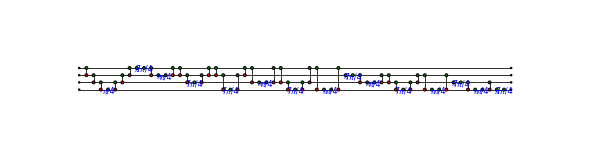

In [113]:
zx.draw(c1)

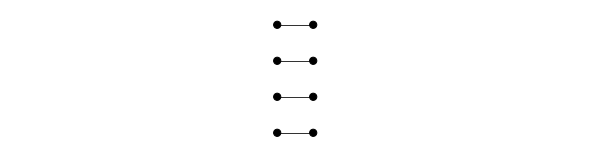

In [114]:
zx.draw(c2)

In [9]:
l

{0: 4, 1: 4, 2: 4, 3: 5}

In [10]:
m

[ 1  1  1  1  0  0  0  0 ]
[ 1  1  0  0  1  0  0  1 ]
[ 1  0  1  0  0  1  0  1 ]
[ 1  0  0  1  0  0  1  0 ]

In [91]:
circ = zx.generate.cliffordT(5, 400, p_t=0.2)
g = circ.copy()
zx.simplify.full_reduce(g)
c = zx.extract.streaming_extract(g, quiet=False)
zx.compare_tensors(circ.to_tensor(), c.to_tensor())

Greedy reduction with 1 CNOTs
Greedy reduction with 2 CNOTs
Complicated phase gadget
Greedy reduction with 1 CNOTs
Greedy reduction with 1 CNOTs
Greedy reduction with 1 CNOTs
Greedy reduction with 1 CNOTs
11/40
Greedy reduction with 2 CNOTs
Simple phase gadget
Greedy reduction with 1 CNOTs
Complicated phase gadget
Greedy reduction with 2 CNOTs
Greedy reduction with 1 CNOTs
Greedy reduction with 2 CNOTs
21/40
Greedy reduction with 2 CNOTs
Greedy reduction with 1 CNOTs
Greedy reduction with 1 CNOTs
Greedy reduction with 1 CNOTs
Greedy reduction with 1 CNOTs
31/40
Greedy reduction with 1 CNOTs
Greedy reduction with 1 CNOTs


True